## Dynamic time series model

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics import tsaplots
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

### Loading train file with residual

In [2]:
train = pd.read_csv('train.csv',parse_dates = ["DATE"])
train.set_index('DATE',inplace=True)

In [3]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,resid,fitted,fitted_resid,fitted_ESM,APE_ESM
DATE,,,,,,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635,79.515309,1340.365691,40.449850,1380.815541,2.751319
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635,68.294312,1311.210688,73.698149,1384.908837,0.391723
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560,53.192221,1312.913779,67.677884,1380.591663,1.060362
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560,42.706762,1321.746238,54.945777,1376.692015,0.896991
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560,23.080630,1368.184370,46.668829,1414.853199,1.695450


In [4]:
test = pd.read_csv('test.csv',parse_dates = ["DATE"])
test.set_index('DATE',inplace=True)

### Plotting residuals across time

Text(0, 0.5, 'Residual')

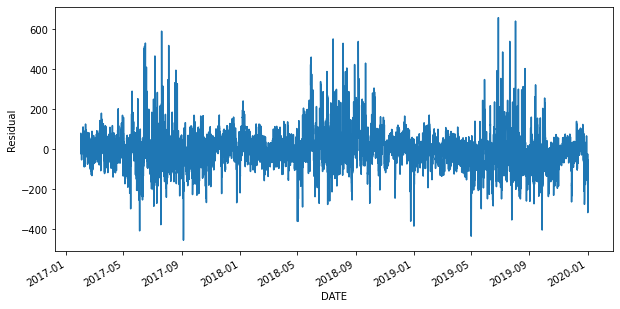

In [5]:
train.resid.plot(figsize=(10,5)).set_ylabel('Residual')

In [6]:
week_data = train['2019-12-01 00:00:00':'2019-12-07 23:59:59']

Text(0, 0.5, 'Residual')

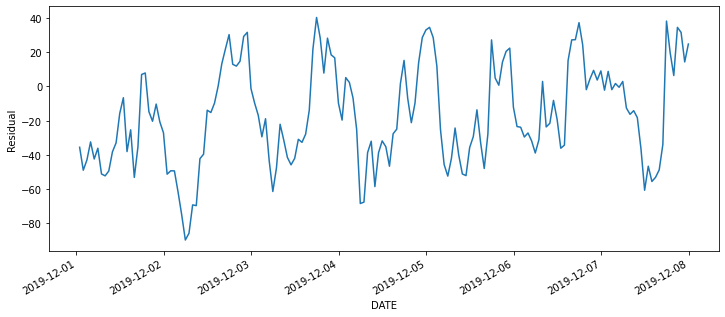

In [7]:
week_data.resid.plot(figsize=(12,5)).set_ylabel('Residual')

### Exponential Smoothing

In [8]:
m = ExponentialSmoothing(train['resid'], trend=None, seasonal='add', seasonal_periods=24).fit()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [9]:
m.summary()

Dep. Variable:,resid,No. Observations:,25560
Model:,ExponentialSmoothing,SSE,35823017.646
Optimized:,True,AIC,185242.310
Trend:,None,BIC,185454.178
Seasonal:,Additive,AICC,185242.373
Seasonal Periods:,24,Date:,"Mon, 15 Mar 2021"
Box-Cox:,False,Time:,20:49:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9145111,alpha,True
smoothing_seasonal,0.0085796,gamma,True


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


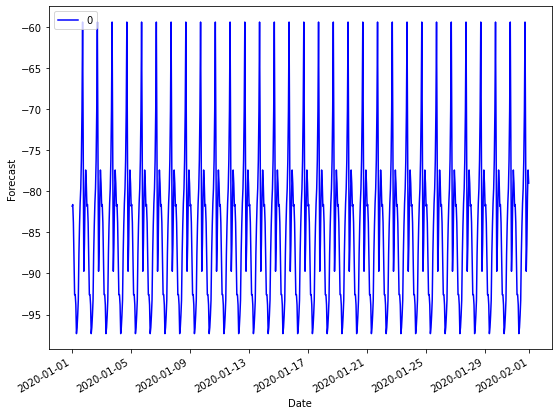

In [10]:
forecast = pd.DataFrame(m.forecast(744))
forecast.index = test.index.copy()

ax1 = forecast.plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('Forecast')
ax1.set_xlabel('Date')

plt.show()

In [11]:
train['fitted_resid'] = m.fittedvalues
test['pred_resid'] = forecast

In [12]:
train['fitted_ESM'] = train['fitted'] + train['fitted_resid']
test['pred_ESM'] = test['pred'] + test['pred_resid']

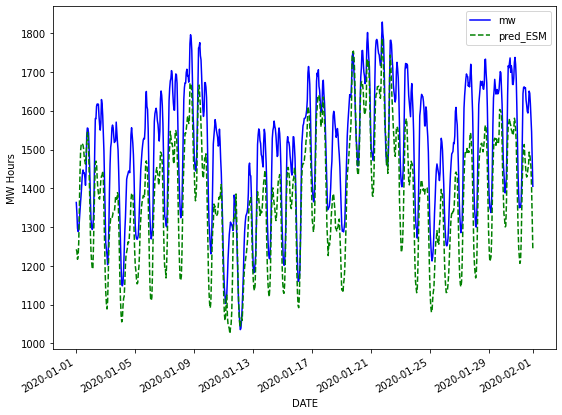

In [13]:
test['mw'].plot(color = 'blue', figsize=(9,7))

plt.ylabel('MW Hours')
plt.xlabel('Date')

test['pred_ESM'].plot(color = 'green', linestyle = 'dashed', figsize=(9,7))

plt.legend(loc="best");

plt.show()

In [14]:
train['APE_ESM'] = abs((train['mw']-train['fitted_ESM'])/train['mw'])*100
print("Training Naive + ESM Model MAPE is: ", train['APE_ESM'].mean())

Training Naive + ESM Model MAPE is:  1.4905166035521087


In [15]:
test['APE_ESM'] = abs((test['mw']-test['pred_ESM'])/test['mw'])*100
print("Naive + ESM Model MAPE is: ", test['APE_ESM'].mean())

Naive + ESM Model MAPE is:  8.062544557742507


In [16]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### ARIMA model

In [19]:
mod = SARIMAX(train['resid'], order=(2,0,0), seasonal_order=(0,1,1,24))
res = mod.fit()

print(res.summary())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                      SARIMAX Results                                       
Dep. Variable:                                resid   No. Observations:                25560
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood             -127404.783
Date:                              Mon, 15 Mar 2021   AIC                         254817.566
Time:                                      21:15:44   BIC                         254850.157
Sample:                                           0   HQIC                        254828.104
                                            - 25560                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8119      0.003    270.885      0.000       0.806       0.818
ar.L2          0.07

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


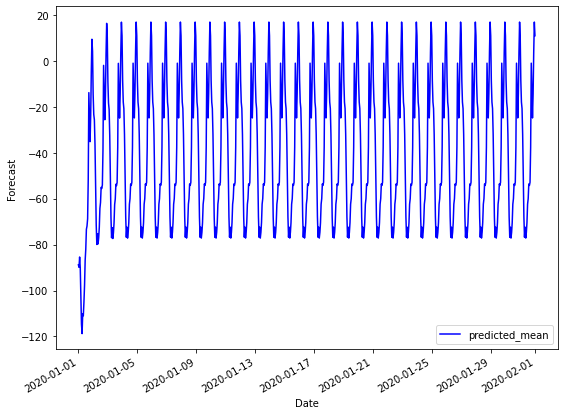

In [20]:
forecast = pd.DataFrame(res.forecast(744))
forecast.index = test.index.copy()

ax1 = forecast.plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('Forecast')
ax1.set_xlabel('Date')

plt.show()

In [21]:
train['fitted_resid2'] = res.predict()
test['pred_resid2'] = forecast

In [22]:
train['fitted_ARIMA'] = train['fitted'] + train['fitted_resid2']
test['pred_ARIMA'] = test['pred'] + test['pred_resid2']

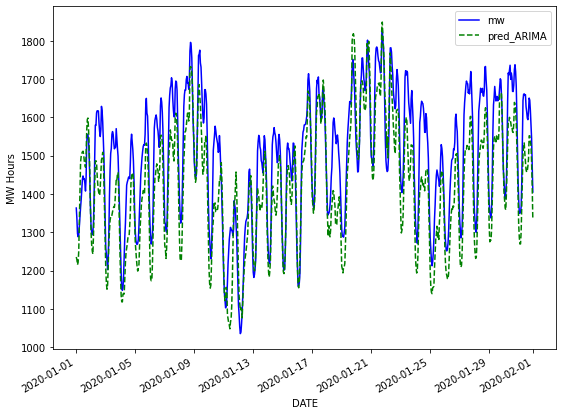

In [24]:
test['mw'].plot(color = 'blue', figsize=(9,7))

plt.ylabel('MW Hours')
plt.xlabel('Date')

test['pred_ARIMA'].plot(color = 'green', linestyle = 'dashed', figsize=(9,7))

plt.legend(loc="best");

plt.show()

In [26]:
train['APE_ARIMA'] = abs((train['mw']-train['fitted_ARIMA'])/train['mw'])*100
print("Training Naive + ARIMA Model MAPE is: ", train['APE_ARIMA'].mean())

Training Naive + ARIMA Model MAPE is:  1.3664432075723658


In [27]:
test['APE_ARIMA'] = abs((test['mw']-test['pred_ARIMA'])/test['mw'])*100
print("Naive + ARIMA Model MAPE is: ", test['APE_ARIMA'].mean())

Naive + ARIMA Model MAPE is:  5.609560867297506


### Ensemble your two residual forecasts from above to obtain a new residual forecast

In [29]:
train['fitted_Ensemble'] = train['fitted'] + 0.5*train['fitted_resid'] + 0.5*train['fitted_resid2']
test['pred_Ensemble'] = test['pred'] + 0.5*test['pred_resid'] + 0.5*test['pred_resid2']

In [31]:
train['APE_Ensemble'] = abs((train['mw']-train['fitted_Ensemble'])/train['mw'])*100
print("Training Naive + Ensemble Model MAPE is: ", train['APE_Ensemble'].mean())

Training Naive + Ensemble Model MAPE is:  1.385254560607261


In [33]:
test['APE_Ensemble'] = abs((test['mw']-test['pred_Ensemble'])/test['mw'])*100
print("Naive + Ensemble Model MAPE is: ", test['APE_Ensemble'].mean())

Naive + Ensemble Model MAPE is:  6.707243635319361
